In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report


C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [2]:
data = pd.read_csv("Pubg_stats.csv")
data.head()

,Unnamed: 0,Player_Name,Matches_Played,Kills,Deaths,Assists,Damage_Dealt,Headshots,Wins,Rank,Revives,Distance_Traveled,Weapons_Used,Time_Survived,Top_10s
0,0,StealthMaster,250,587,143,98,15243,234,32,Gold,67,72560,12,28976,145
1,1,SniperLion,312,823,218,112,18975,312,42,Diamond,95,89042,15,33652,189
2,2,NinjaGamer,186,492,84,56,11786,156,28,Platinum,48,60924,10,21764,97
3,3,ThunderStrike,409,923,267,134,21037,288,55,Silver,128,98234,18,40128,258
4,4,SpeedDemon,143,368,68,42,9865,123,20,Gold,36,52072,8,16834,72


In [3]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
columns_to_drop = ['Unnamed: 0', 'Player_Name','Rank']
columns_to_scale = ['Matches_Played','Kills','Deaths','Assists','Damage_Dealt','Headshots','Wins','Top_10s','Revives','Distance_Traveled','Weapons_Used','Time_Survived']
dropped_columns = data[columns_to_drop]
data_dropped_columns = data.drop(columns_to_drop, axis=1)
scaled_features = scalar.fit_transform(data_dropped_columns)
df_scaled_features = pd.DataFrame(scaled_features, columns = columns_to_scale)
integrated_df = pd.concat([df_scaled_features, dropped_columns], axis=1)


In [6]:
from sklearn.model_selection import train_test_split
X = df_scaled_features
Y = data['Rank']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state = 2) 

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logisticRegr = LogisticRegression()

In [12]:
logisticRegr.fit(x_train,y_train)

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print(logisticRegr.predict(x_test.iloc[0].values.reshape(1, -1)))


['Diamond']


In [17]:

logisticRegr.predict(x_test[0:10])

array(['Diamond', 'Gold', 'Diamond', 'Gold', 'Diamond', 'Platinum',
       'Platinum', 'Gold', 'Platinum', 'Platinum'], dtype=object)

In [21]:
predictions = logisticRegr.predict(x_test)


In [22]:
score = logisticRegr.score(x_test,y_test)
print(score)

0.8444444444444444


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [25]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[11  0  1  0]
 [ 0 10  2  0]
 [ 2  0 17  1]
 [ 0  1  0  0]]


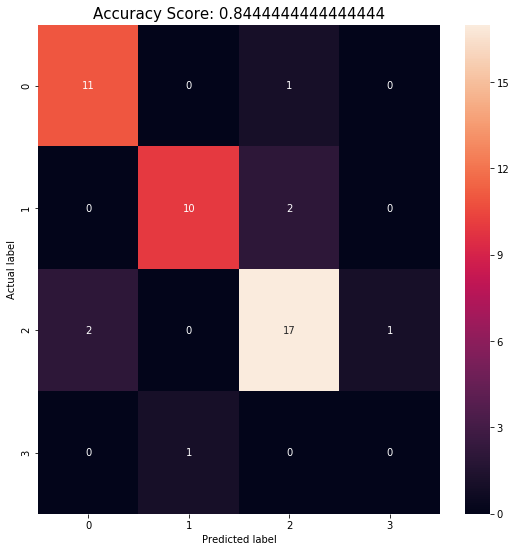

In [30]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot= True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     Diamond       0.85      0.92      0.88        12
        Gold       0.91      0.83      0.87        12
    Platinum       0.85      0.85      0.85        20
      Silver       0.00      0.00      0.00         1

    accuracy                           0.84        45
   macro avg       0.65      0.65      0.65        45
weighted avg       0.85      0.84      0.84        45

